In [ ]:
pip install lpips

     |████████████████████████████████| 61kB 2.4MB/s 


In [ ]:
#Intensity experiment
import lpips
import numpy as np
import torch


use_gpu = False         # Whether to use GPU
spatial = True         # Return a spatial map of perceptual distance.

# Linearly calibrated models (LPIPS)
loss_fn_vgg = lpips.LPIPS(net='vgg')

if(use_gpu):
    loss_fn.cuda()

white = torch.ones([1,3,64,64])
gray = torch.zeros([1,3,64,64])
black = torch.ones([1,3,64,64])*-1
#-1: back 0: Gray 1: white
#Compute Perceptual loss
d0 = loss_fn_vgg(white,black)
d1 = loss_fn_vgg(gray,black)
d3 = loss_fn_vgg(white,gray)
print("Perceptural loss{white, black):",d0,"Perceptural loss{gray,black):",d1,"Perceptural loss{white,gray):",d3)

#Compute L2 loss
loss = torch.nn.MSELoss()

d0 = loss(white,black)
d1 = loss(gray,black)
d2 = loss(white,gray)
print("L2 loss{white, black):",d0,"L2 loss{gray,black):",d1,"L2 loss{white,gray):",d2)

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Loading model from: /usr/local/lib/python3.7/dist-packages/lpips/weights/v0.1/vgg.pth
Perceptural loss{white, black): tensor([[[[0.4538]]]], grad_fn=<AddBackward0>) Perceptural loss{gray,black): tensor([[[[0.5390]]]], grad_fn=<AddBackward0>) Perceptural loss{white,gray): tensor([[[[0.4945]]]], grad_fn=<AddBackward0>)
L2 loss{white, black): tensor(4.) L2 loss{gray,black): tensor(1.) L2 loss{white,gray): tensor(1.)


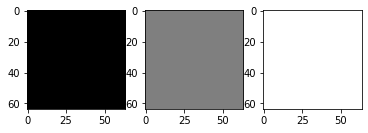

In [ ]:
#plot white/gray/black images
black = (black+1)/2
gray = (gray+1)/2
white = (white+1)/2

import matplotlib.pyplot as plt
plt.subplot(131)
plt.imshow(black[0,:,:,:].permute(1, 2, 0)  )
plt.subplot(132)
plt.imshow(gray[0,:,:,:].permute(1, 2, 0)  )
plt.subplot(133)
plt.imshow(white[0,:,:,:].permute(1, 2, 0)  )

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Vassily_Kandinsky.jpg to Vassily_Kandinsky.jpg


In [ ]:
#Contrast experiment
from PIL import Image
import cv2
# Read image
img_o = Image.open("Vassily_Kandinsky.jpg")
img_o = img_o.resize((512,512))

img = np.array(img_o)
img = np.transpose(img,[2,0,1])
img = img[np.newaxis,:,:,:]
#print(img.shape)

#change the contrast
img1 = (img - np.min(img))/np.ptp(img)
#print(np.min(img1),np.max(img1))

img2 = np.square(img1)

img3 = np.power(img1,5)


img11 = torch.from_numpy(img1)
img22 = torch.from_numpy(img2)
img33 = torch.from_numpy(img3)
img11,img22,img33=img11.type(torch.FloatTensor),img22.type(torch.FloatTensor),img33.type(torch.FloatTensor)

#compute perceptural loss
l_p1 = loss_fn_vgg(img11,img22)
l_p2 = loss_fn_vgg(img11,img33)
#compute L2 loss
l_m1 = loss(img11,img22)
l_m2 = loss(img11,img33)

print(l_p1,l_p2)

print(l_m1, l_m2)

(1, 3, 512, 512)
0.0 1.0
tensor([[[[0.1251]]]], grad_fn=<AddBackward0>) tensor([[[[0.4468]]]], grad_fn=<AddBackward0>)
tensor(0.0341) tensor(0.1367)


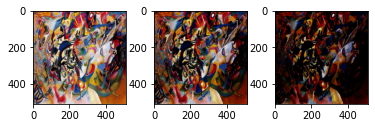

In [ ]:
#plot images
import matplotlib.pyplot as plt
plt.subplots_adjust(wspace =0.3, hspace =0)
plt.subplot(131)
plt.imshow(img11[0,:,:,:].permute(1, 2, 0))
plt.subplot(132)
plt.imshow(img22[0,:,:,:].permute(1, 2, 0))
plt.subplot(133)
plt.imshow(img33[0,:,:,:].permute(1, 2, 0))